# Before You Start

* **What is Embedding Model ?**
> - Processing text for NLP tasks requires a numeric representation of each word.
>* Embedding is the process of converting
data (text, image,...)
into vectors representation
\begin{equation}
data \rightarrow vector
\end{equation}
> * Embedding capture the semandtic reationship between words.
> * words with closer meanings or relationships are closer in the vector space than words that are less related.
> * the dim size of an embedding vector is different from model to model, smaller vectors (lower dimensions) are more efficient to keep in memory or to process, while bigger vectors (higher dimensions) can capture intricate relationships, but are prone to overfitting.


* **Static Vs Dynamic Embedding (Attention Models)?**

<center>

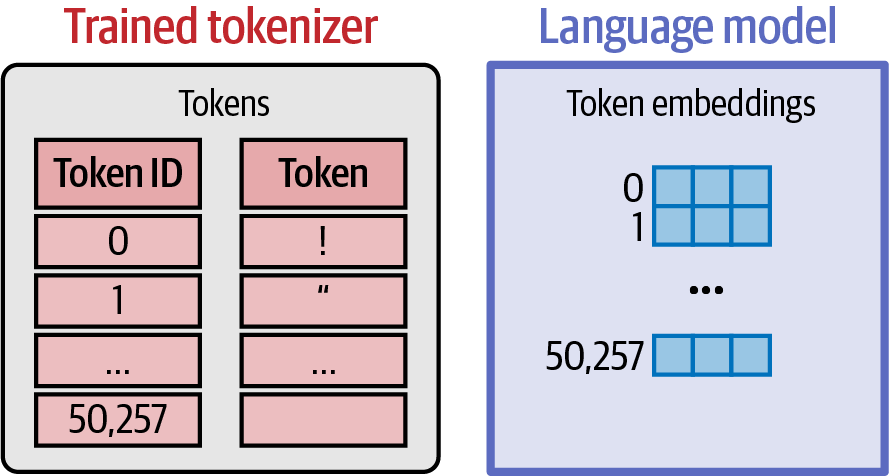
</center>

> - **Static embedding:** Each word or token is assigned a fixed vector representation, regardless of its context within a sentence or document. These vectors are typically pre-trained on a large corpus of text and remain unchanged during model training or inference.

<center>

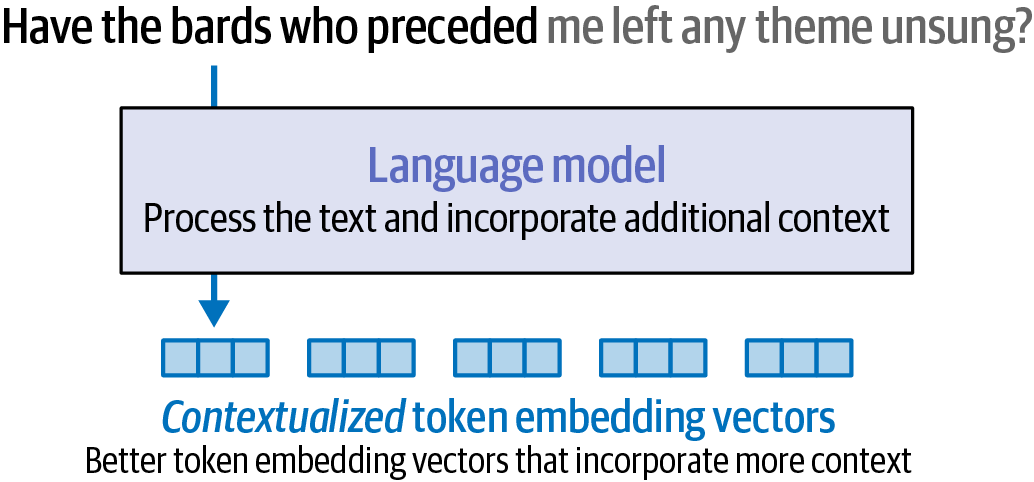
</center>

> - **Dynamic embedding:** Also known as contextual embeddings, these representations are generated on-the-fly, taking into account the context of the word within the input sequence. This allows the model to capture the nuanced meanings of words based on their surrounding words.

<center>

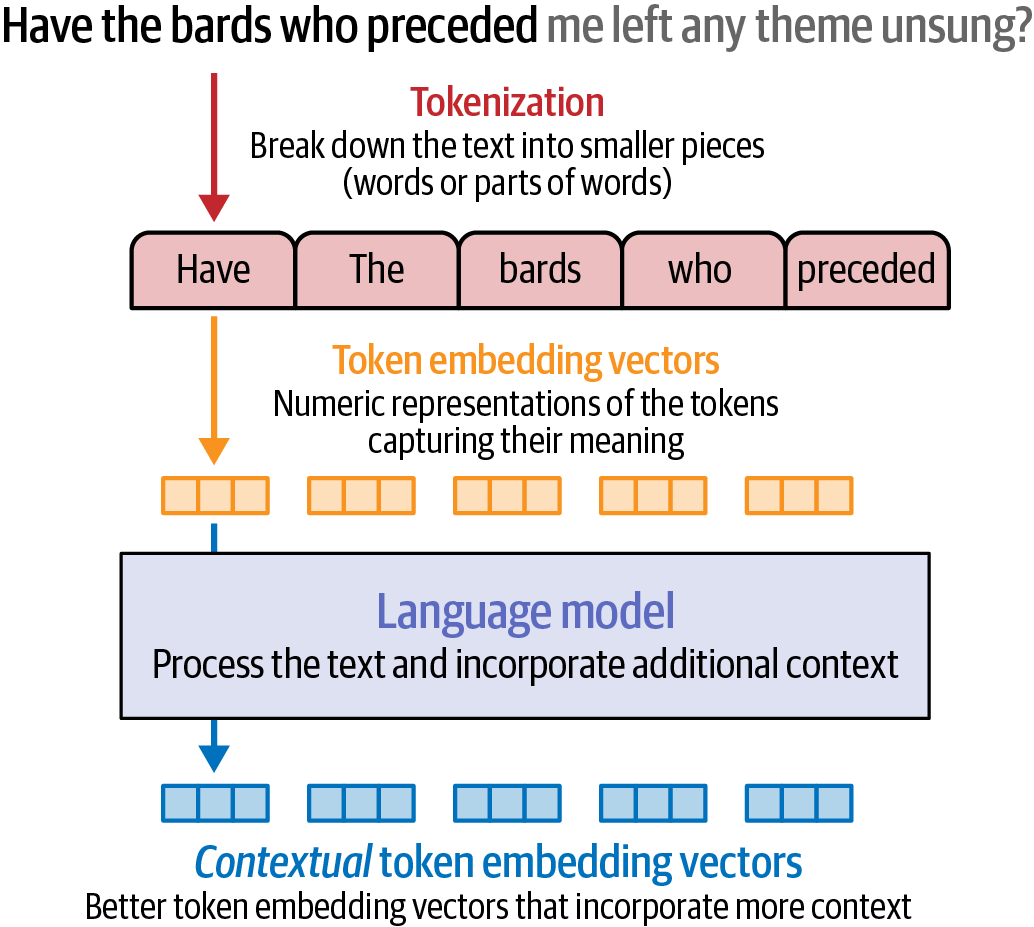
</center>

* ***BERT (Bidirectional encoder representations from transformers)***

> BERT inspired from the Transformer architecture introduced in "Attention is all you need", to become an encoder-only transformer that can produce meaningful representations and understand language.

> In the pretraining phase, BERT is trained to learn two tasks simultaneously:
1. **Masked Language Modeling**: is to predict masked words in a sentence (I [MASKED] this book before -> read)
2. **Next Sentence Prediction:** given two sentences, predict if A came before B or not. The special [SEP] token separates the two sentences and the task is similar to binary classification.

* ***why is BERT important?***

> BERT is among the first instances of Transformer-based contextualized, dynamic embeddings. When given a sentence as input, the layers of the BERT model use self-attention and feed-forward mechanisms to update and incorporate context from all other tokens in the sentence. The final output of each Transformer layer is a **contextualized representation of the word**.

* **How BERT Embedding Model Works with SentenceTransformers?***

>SentenceTransformers is a framework provides an easy method to compute embeddings for accessing, using, and training state-of-the-art embedding and reranker models.

  

1.   Compute Embedding
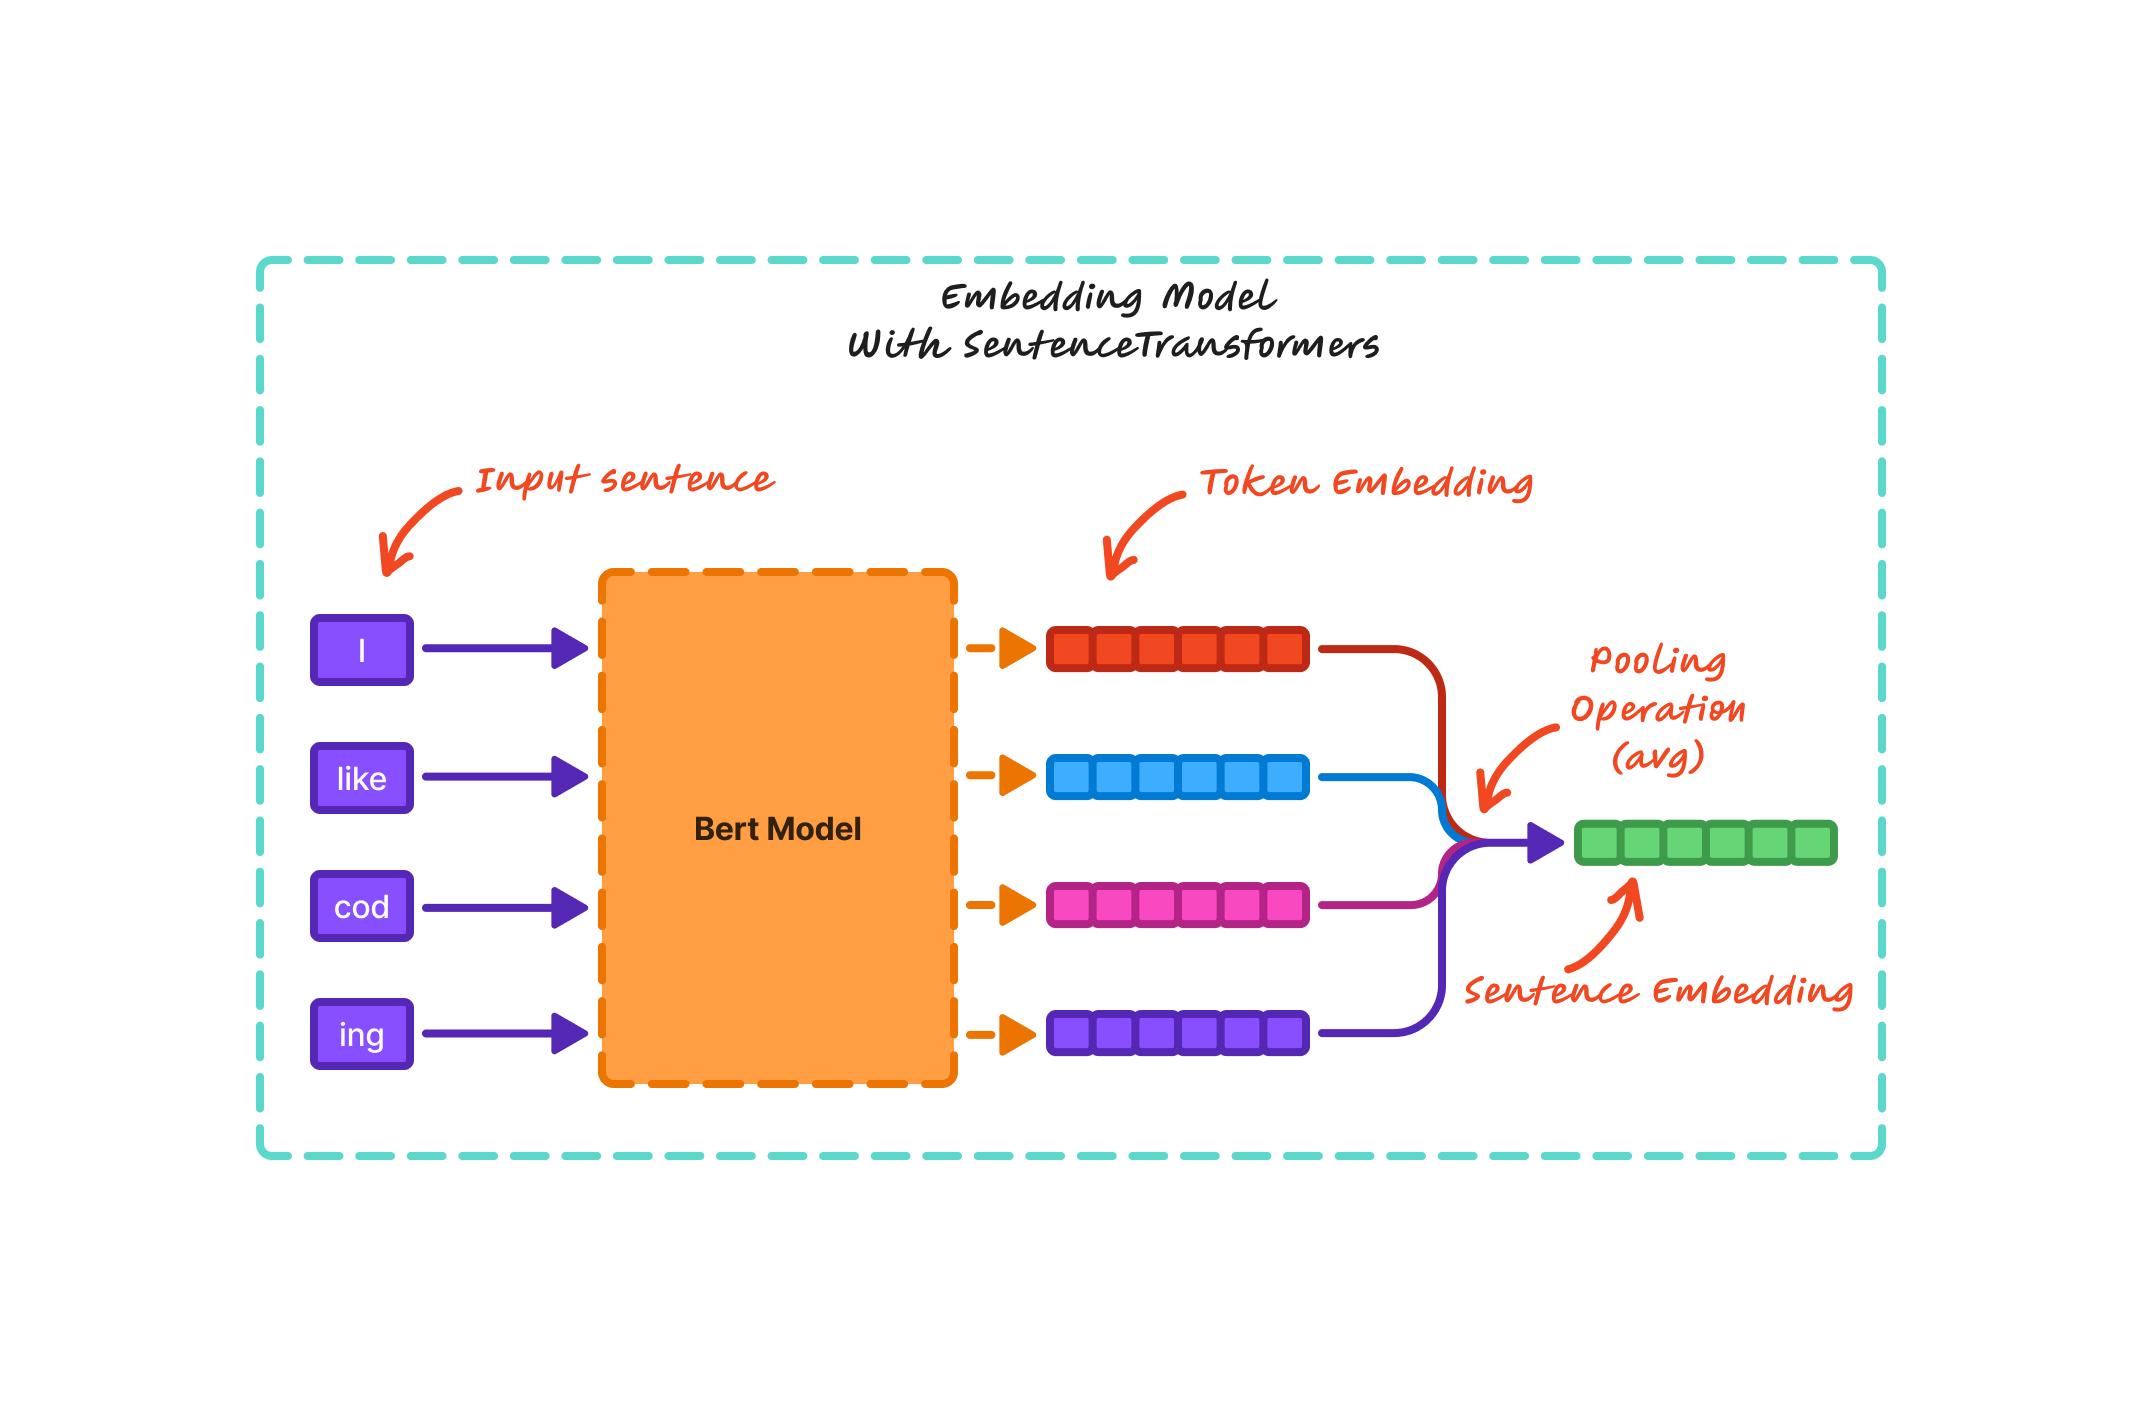

2.   Calculate Similarity

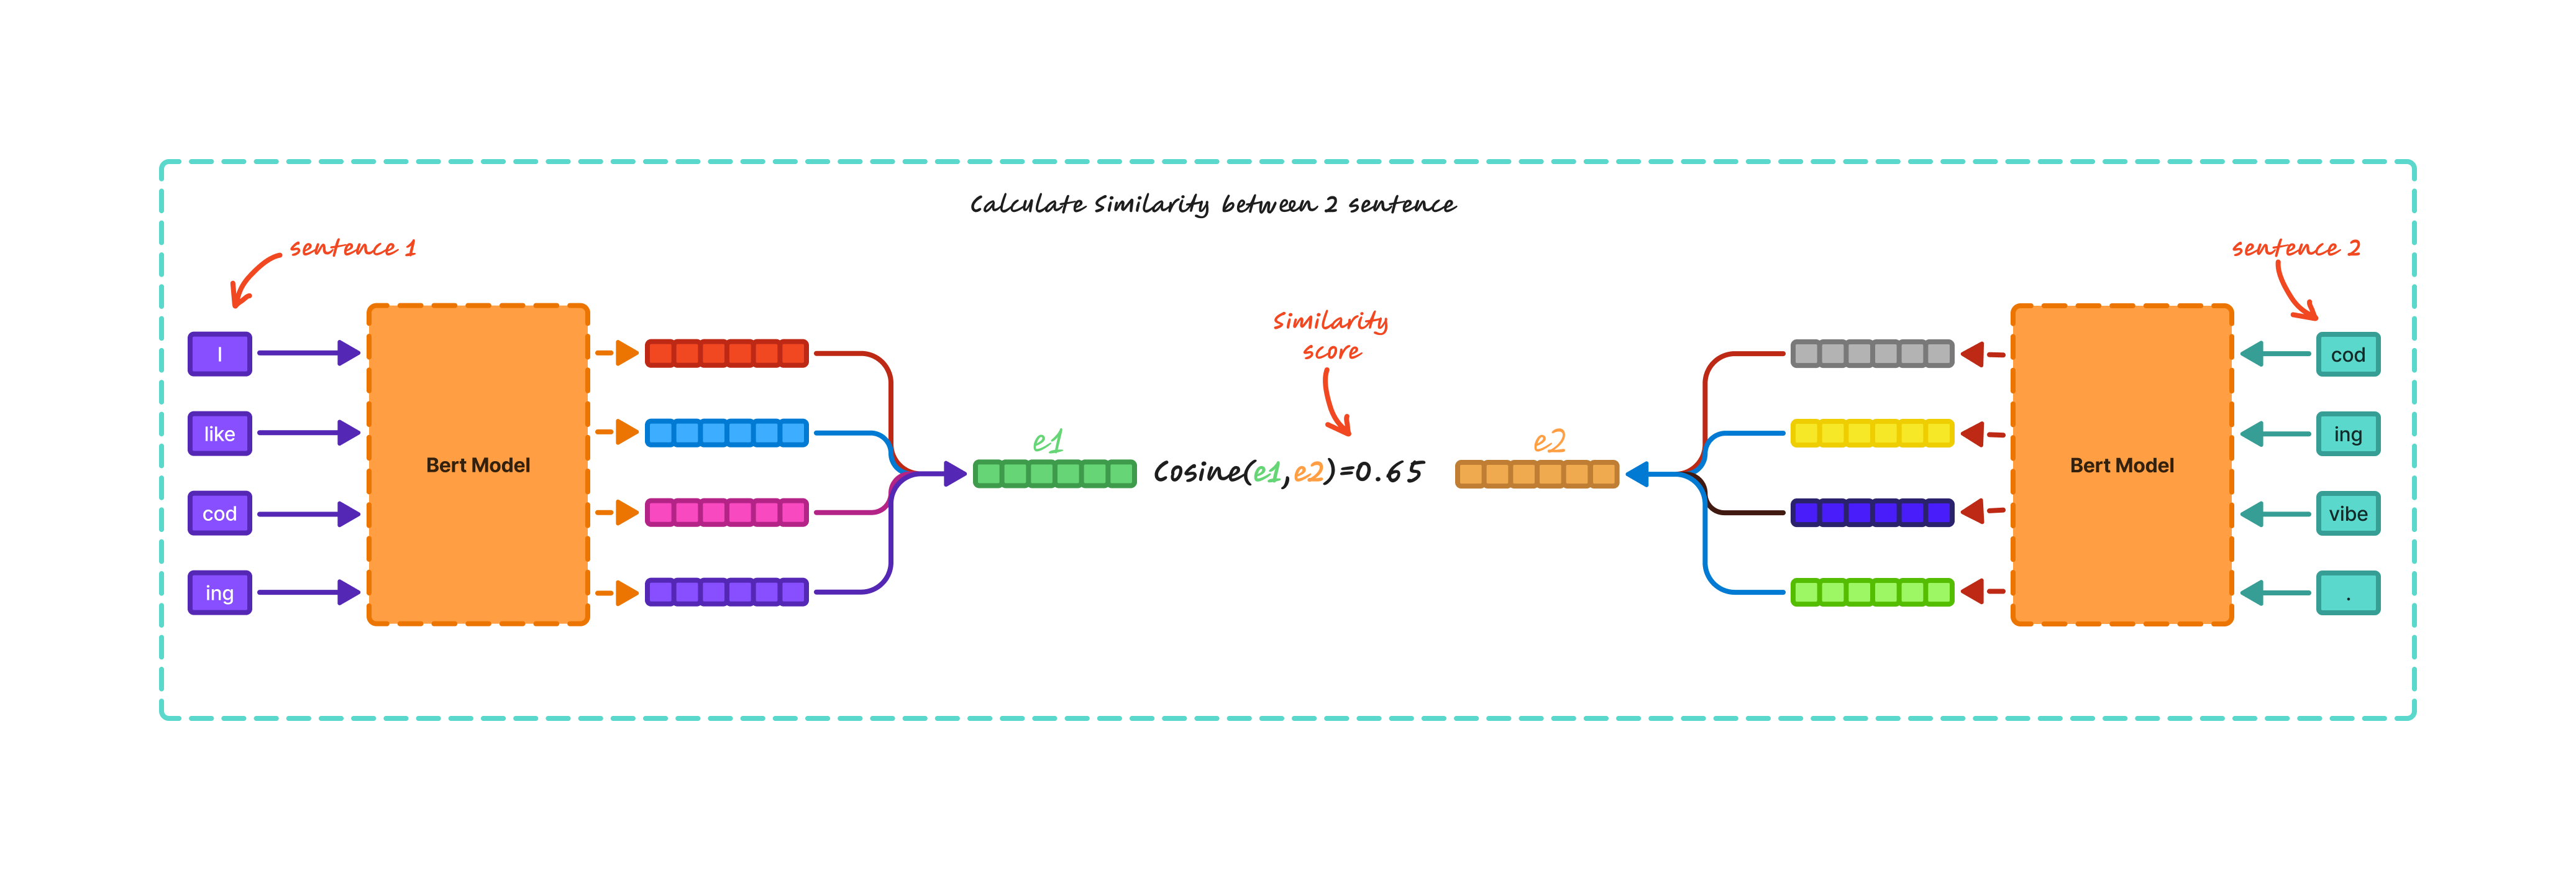


* ***Steps To Get Your Embedding Model***
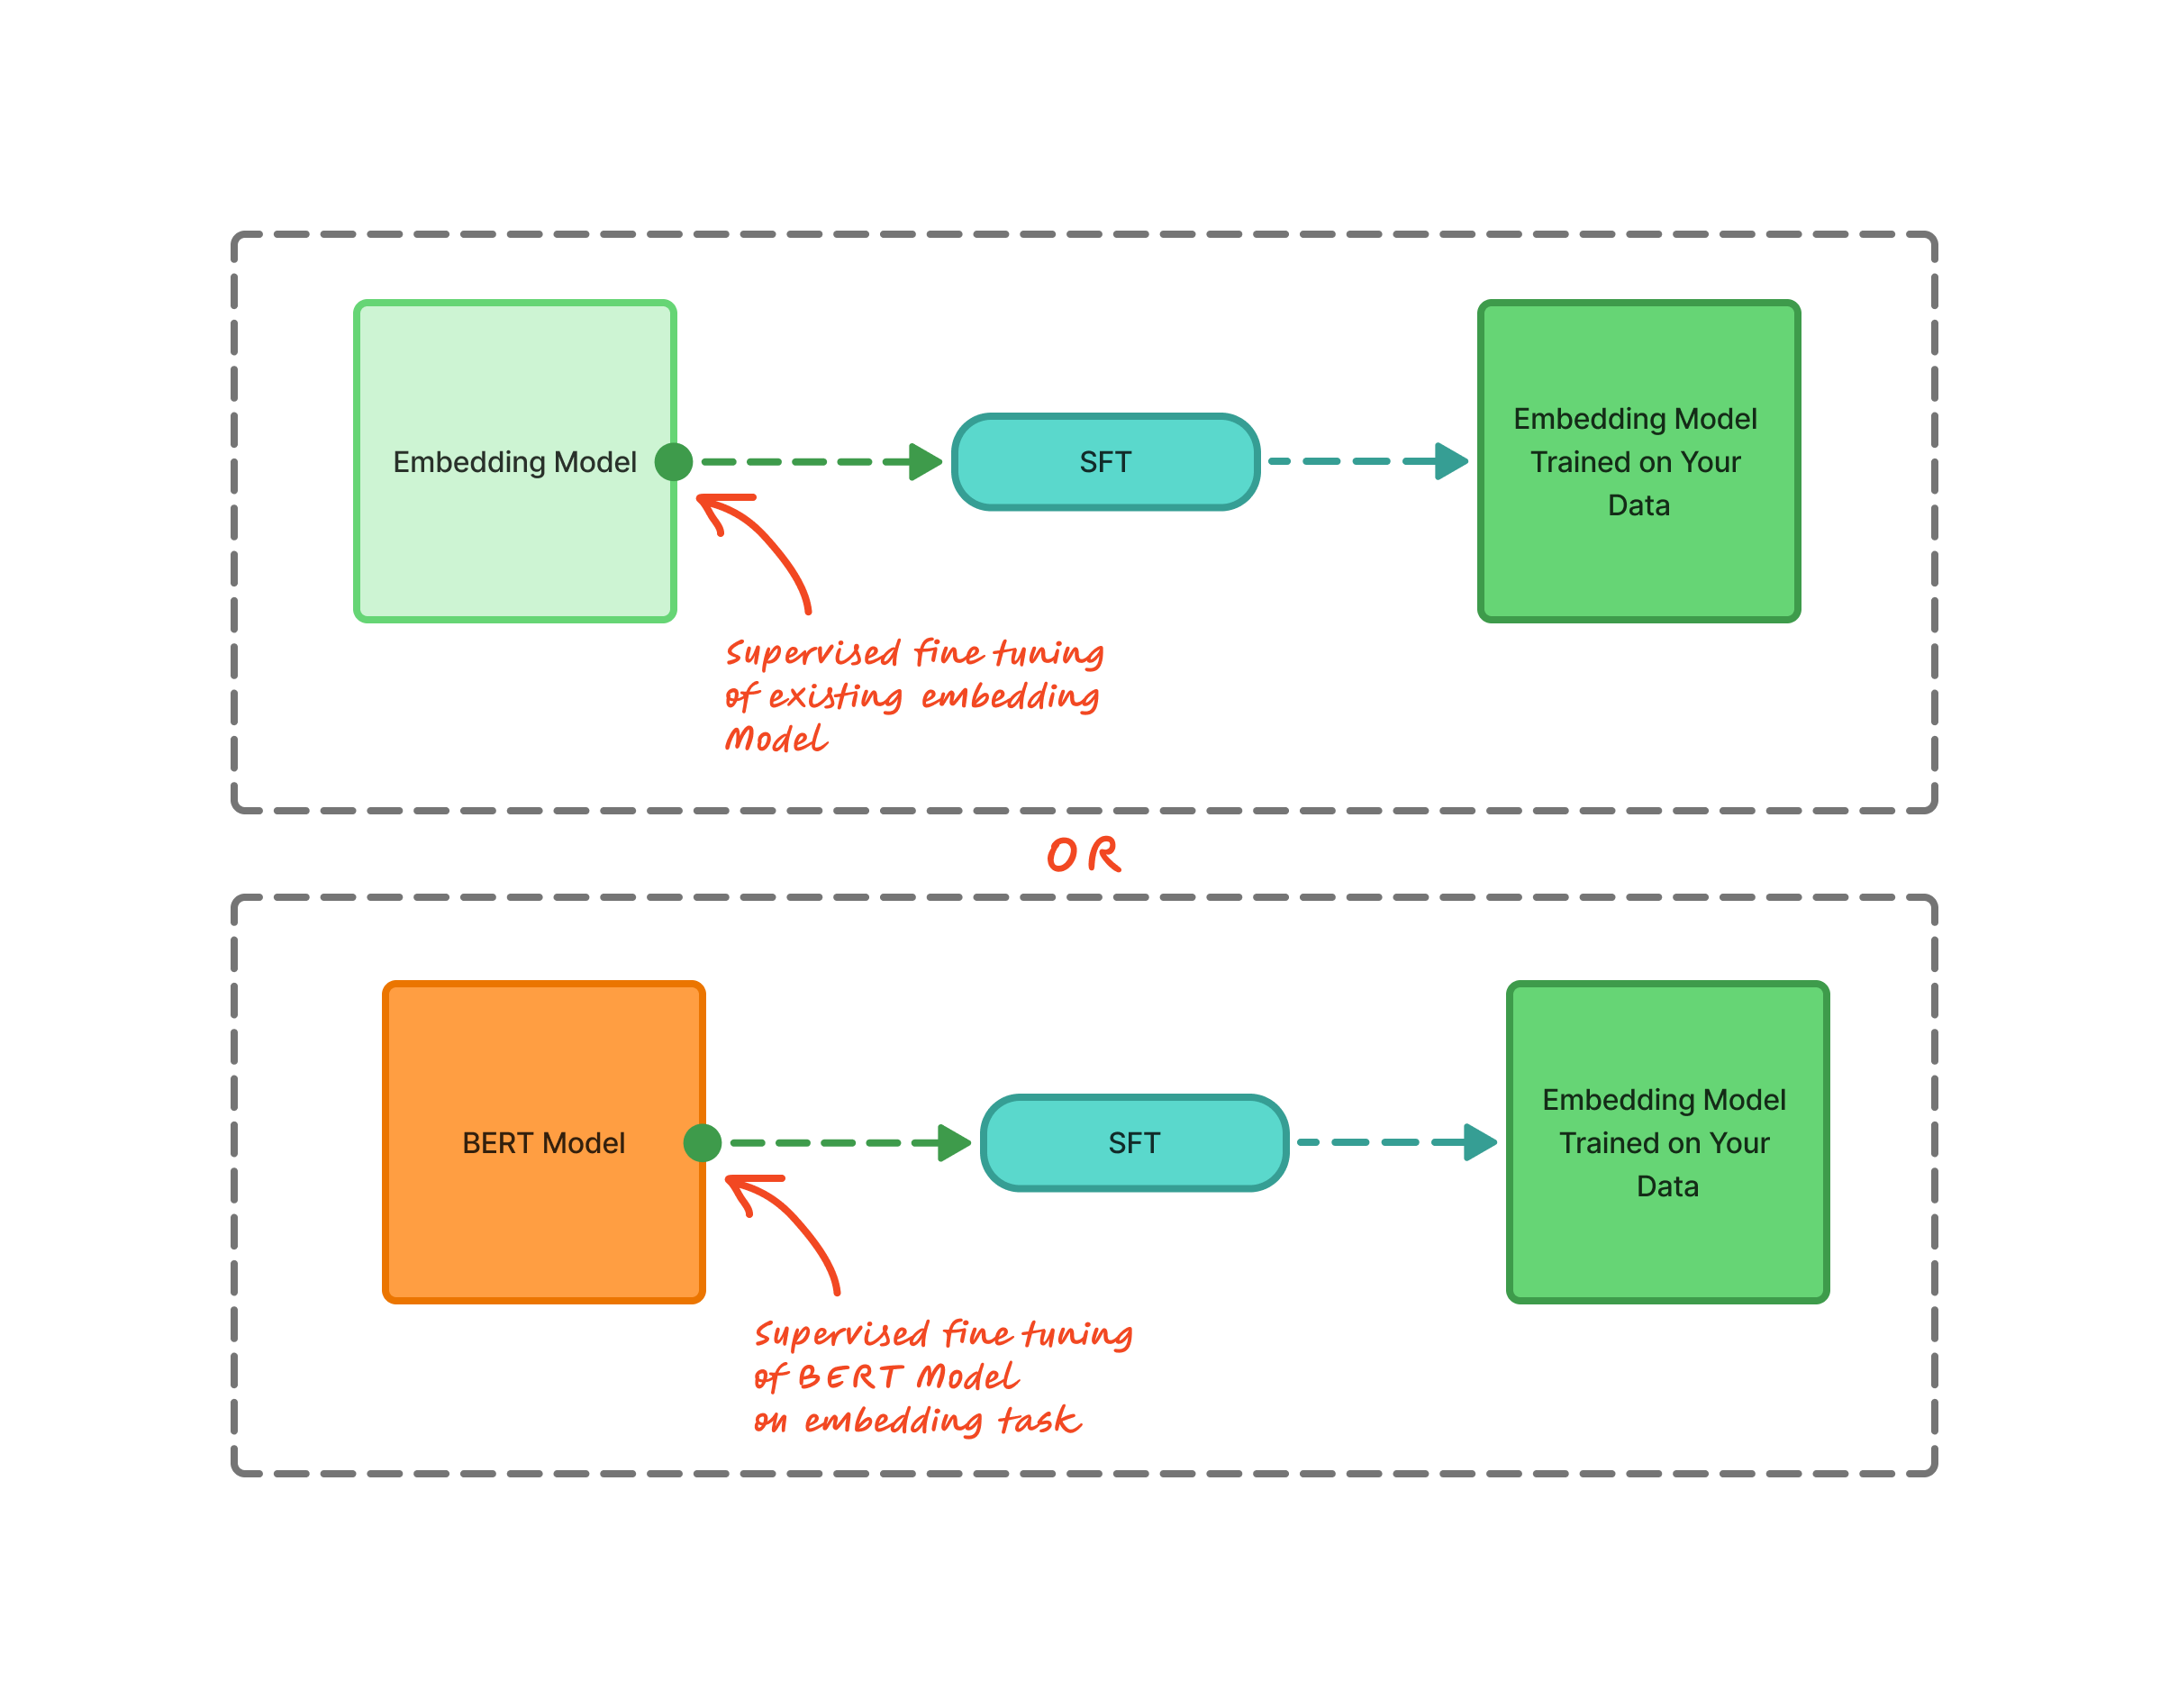

# Fine-tuning Embedding Model (SFT)

**In this stage, we can fine-tune our pretrained BERT model, or another selected embedding model.**
* We will fine-tune our selected model using the **[SBERT](https://sbert.net/)** library.
* To fine-tune an existing embedding model, you can use **[mteb leaderboard](https://huggingface.co/spaces/mteb/leaderboard)**.

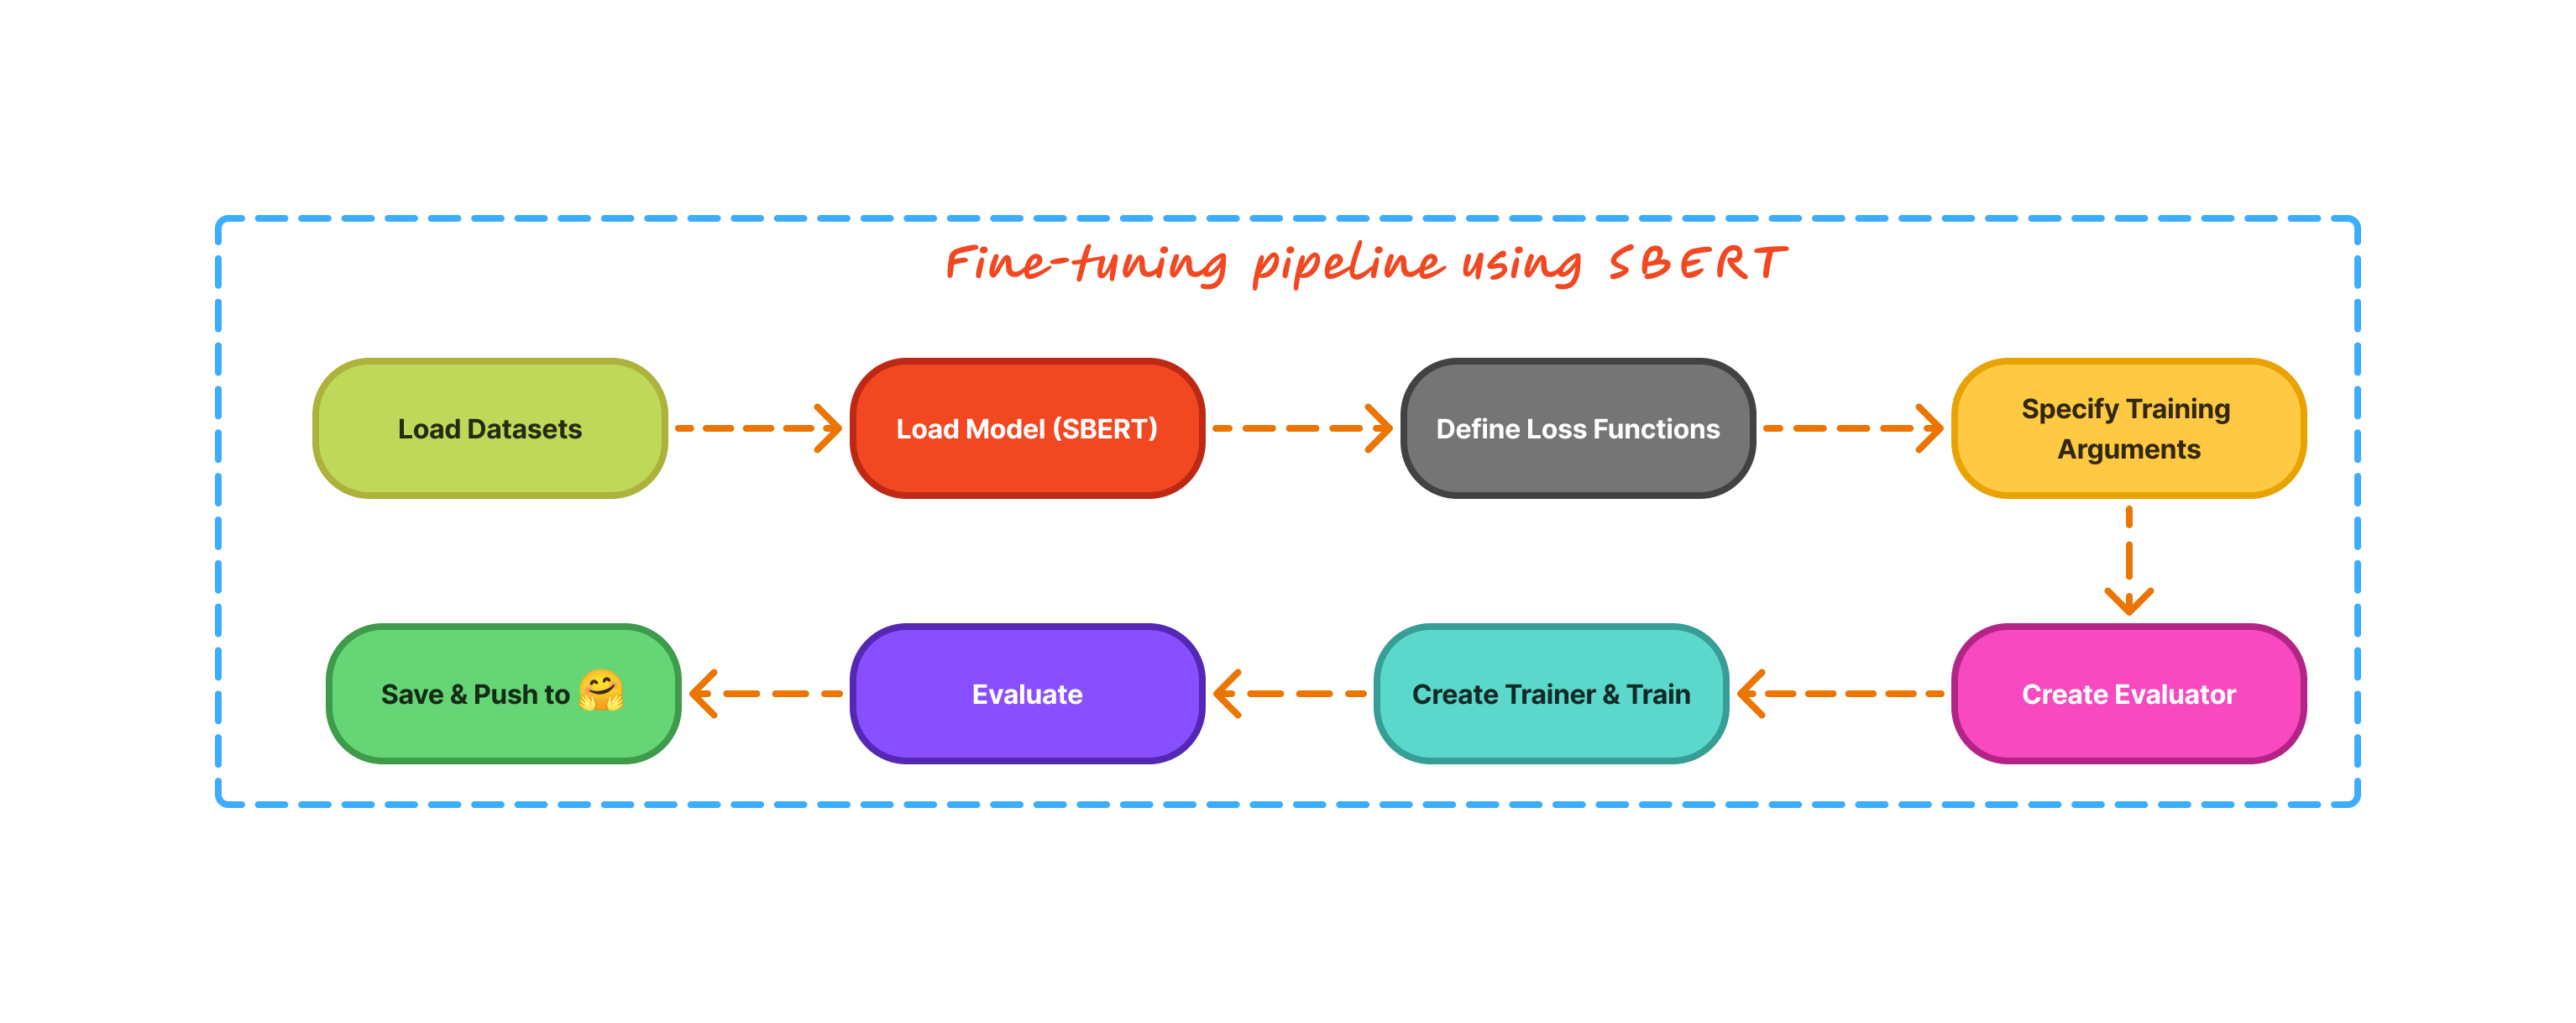

#### install requirements

In [ ]:
! uv pip install -U sentence-transformers datasets

#### HF Login

In [ ]:
from huggingface_hub import login
login()

#### Load Dataset

In [ ]:
from datasets import load_dataset

In [ ]:
ds_id="sentence-transformers/all-nli"
ds=load_dataset(ds_id,name="pair-score",split="train[:100]")
ds

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.15k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


train-00000-of-00001.parquet:   0%|          | 0.00/69.5M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


dev-00000-of-00001.parquet:   0%|          | 0.00/1.57M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


test-00000-of-00001.parquet:   0%|          | 0.00/1.61M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/942069 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/19657 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/19656 [00:00<?, ? examples/s]

Dataset({
    features: ['sentence1', 'sentence2', 'score'],
    num_rows: 100
})

In [ ]:
ds.to_pandas().head(10)

,sentence1,sentence2,score
0,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,0.5
1,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",0.0
2,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",1.0
3,Children smiling and waving at camera,They are smiling at their parents,0.5
4,Children smiling and waving at camera,There are children present,1.0
5,Children smiling and waving at camera,The kids are frowning,0.0
6,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,0.0
7,A boy is jumping on skateboard in the middle o...,The boy does a skateboarding trick.,1.0
8,A boy is jumping on skateboard in the middle o...,The boy is wearing safety equipment.,0.5
9,An older man sits with his orange juice at a s...,An older man drinks his juice as he waits for ...,0.5


#### Split Dataset

In [ ]:
ds=ds.train_test_split(test_size=0.2,shuffle=True)
train_dataset,eval_dataset=ds["train"],ds["test"]
train_dataset,eval_dataset

(Dataset({
     features: ['sentence1', 'sentence2', 'score'],
     num_rows: 80
 }),
 Dataset({
     features: ['sentence1', 'sentence2', 'score'],
     num_rows: 20
 }))

#### Load Model

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
model_id="abdeljalilELmajjodi/model"
model=SentenceTransformer(model_id)

config.json:   0%|          | 0.00/702 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of XLMRobertaModel were not initialized from the model checkpoint at abdeljalilELmajjodi/model and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

In [ ]:
# test model
sentence="hello world"
s_embedding=model.encode(sentence) # calculate embedding of sentence
model.similarity(s_embedding,s_embedding) # calculate the similarity

tensor([[1.0000]])

#### Define Loss function(s)

[**How to select loss function?**](https://sbert.net/docs/cross_encoder/loss_overview.html)

<center>

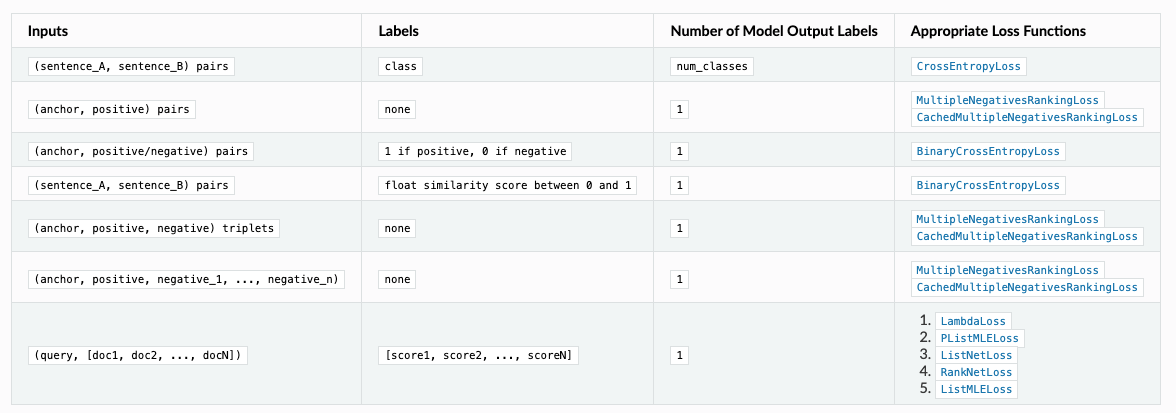
</center>

In [ ]:
from sentence_transformers.losses import CoSENTLoss
loss=CoSENTLoss(model)

#### Training Arguments

In [ ]:
# Specify training arguments
from sentence_transformers.trainer import SentenceTransformerTrainingArguments
training_args = SentenceTransformerTrainingArguments(
    output_dir="./result_model",
    eval_strategy="steps",
    learning_rate=5e-5,
    warmup_ratio=0.05,
    gradient_accumulation_steps=1,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=1,
    save_total_limit=1,
    bf16=True,
    fp16_full_eval=True,
    logging_steps=5,
    save_steps=10,
    eval_steps=10,
    report_to="wandb",
    push_to_hub=True,
    gradient_checkpointing=True,
    load_best_model_at_end=True,
    logging_first_step=True,
)

#### Evaluator

[**How to select the right evaluator?**](https://sbert.net/docs/sentence_transformer/training_overview.html#evaluator)

<center>

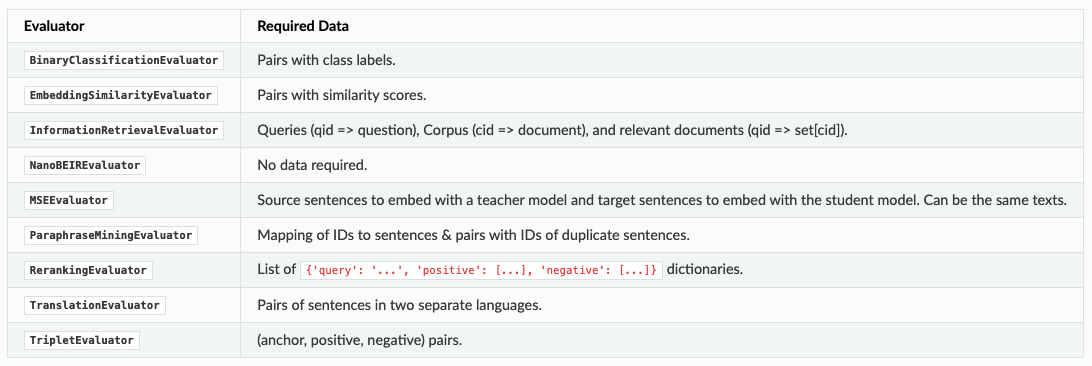
</center>

In [ ]:
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
pair_score_evaluator = EmbeddingSimilarityEvaluator(
    sentences1=eval_dataset["sentence1"],
    sentences2=eval_dataset["sentence2"],
    scores=eval_dataset["score"],
    name="pair-score-evaluator-dev",
)

#### Create Trainer

In [ ]:
from sentence_transformers.trainer import SentenceTransformerTrainer
trainer = SentenceTransformerTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    loss=loss,
    evaluator=pair_score_evaluator,
)

Computing widget examples:   0%|          | 0/1 [00:00<?, ?example/s]

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: th3elma2 (th3elma2-enset-mohammedia) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss,Pair-score-evaluator-dev Pearson Cosine,Pair-score-evaluator-dev Spearman Cosine
10,2.961900,2.573799,-0.047130,0.163118


TrainOutput(global_step=10, training_loss=3.030164289474487, metrics={'train_runtime': 256.8629, 'train_samples_per_second': 0.311, 'train_steps_per_second': 0.039, 'total_flos': 0.0, 'train_loss': 3.030164289474487, 'epoch': 1.0})

#### Push Model To HF 🤗

In [ ]:
trainer.push_to_hub("abdeljalilELmajjodi/hack_ai_embbedding_model")

CommitInfo(commit_url='https://huggingface.co/abdeljalilELmajjodi/result_model/commit/faca42795bafacdfac04a5b467127b59eab2d7bd', commit_message='abdeljalilELmajjodi/hack_ai_embbedding_model', commit_description='', oid='faca42795bafacdfac04a5b467127b59eab2d7bd', pr_url=None, repo_url=RepoUrl('https://huggingface.co/abdeljalilELmajjodi/result_model', endpoint='https://huggingface.co', repo_type='model', repo_id='abdeljalilELmajjodi/result_model'), pr_revision=None, pr_num=None)

<center>

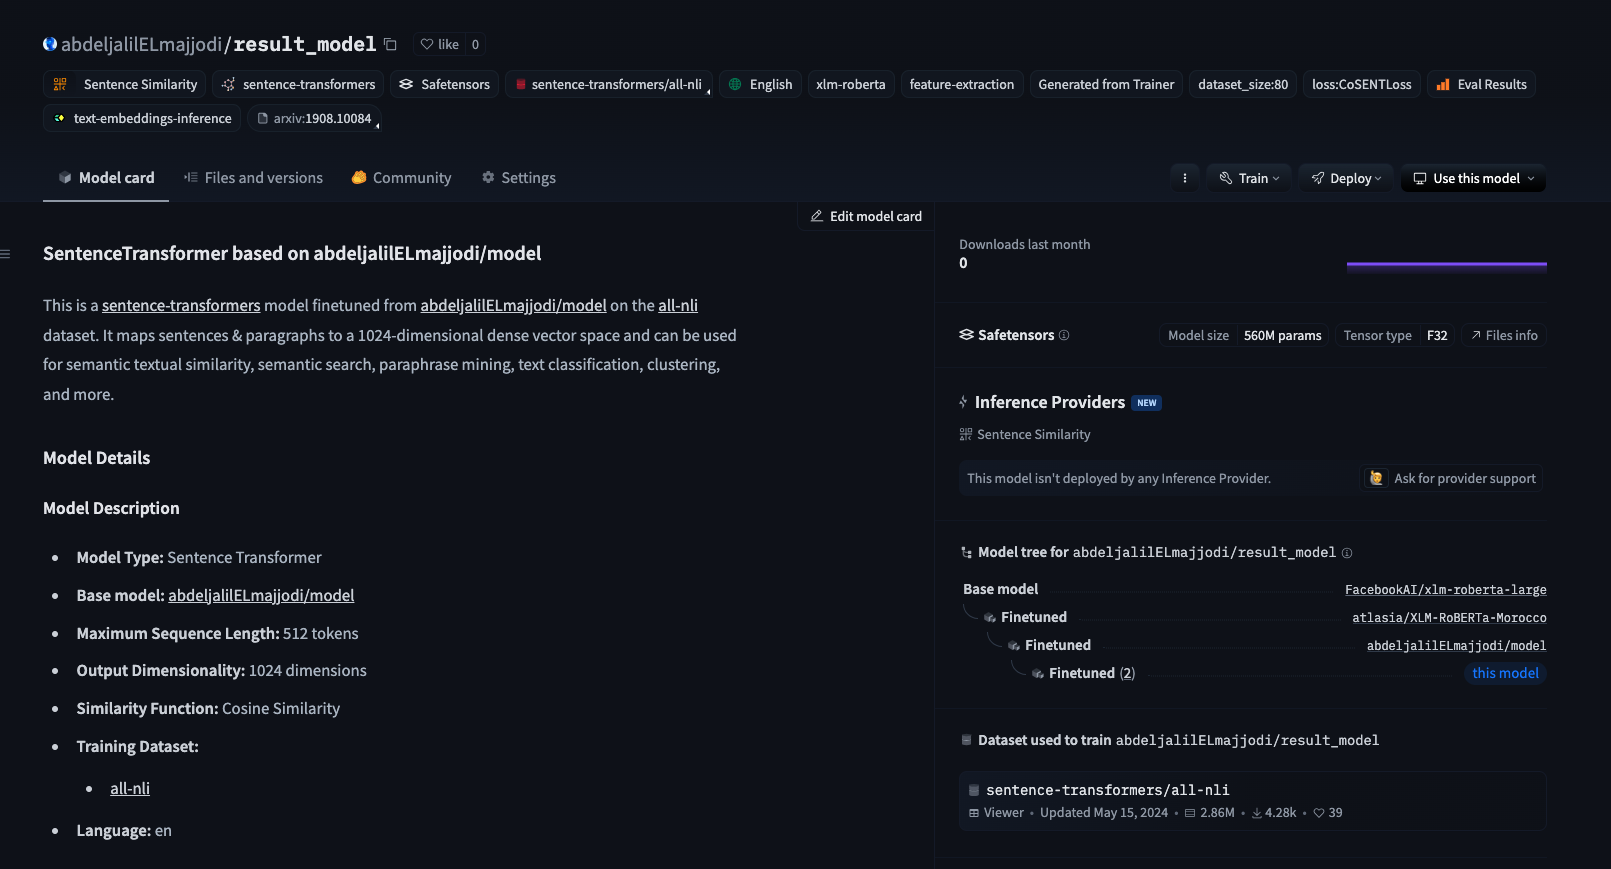

</center>

## Show Your Work (Model Space) at Hugging Face

**In this final step, you will create a Gradio Space on Hugging Face to showcase your work. Follow these steps:**

1. **Clone the repository** from this [space](https://huggingface.co/spaces/atlasia/Masked-LM-Moroccan-Darija).

<center>

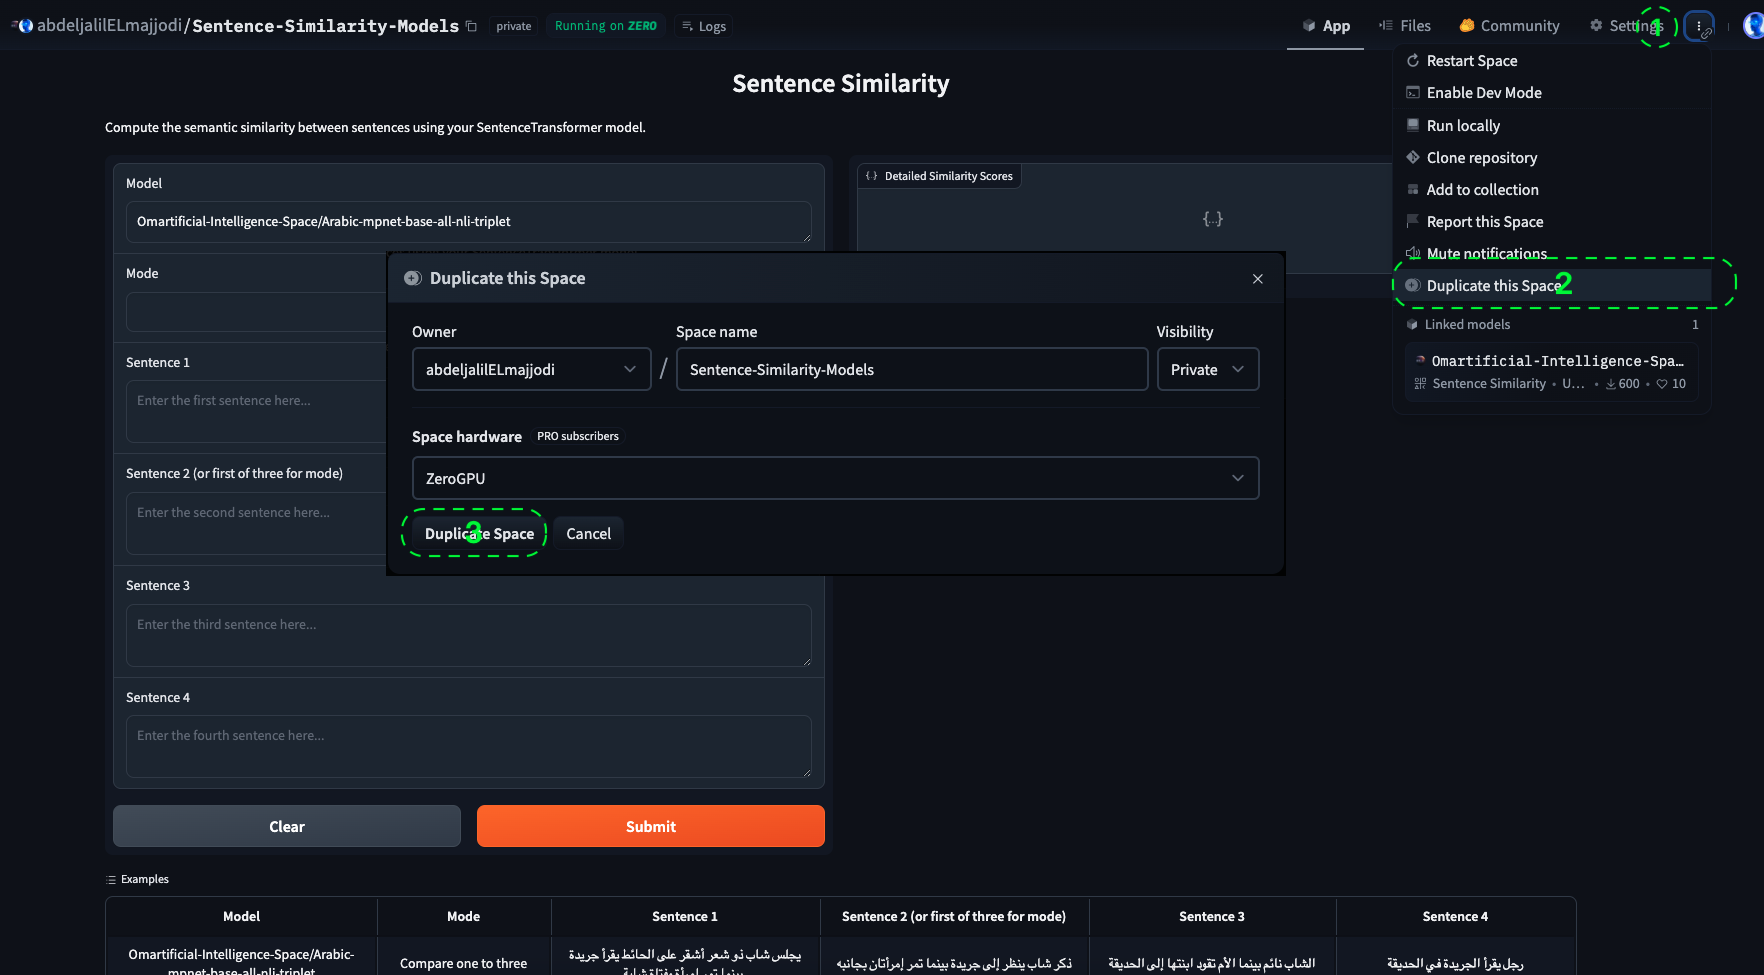
</center>

2. **Open the code files** and **replace the model ID** with the ID of your own trained Embedding model.

</center>

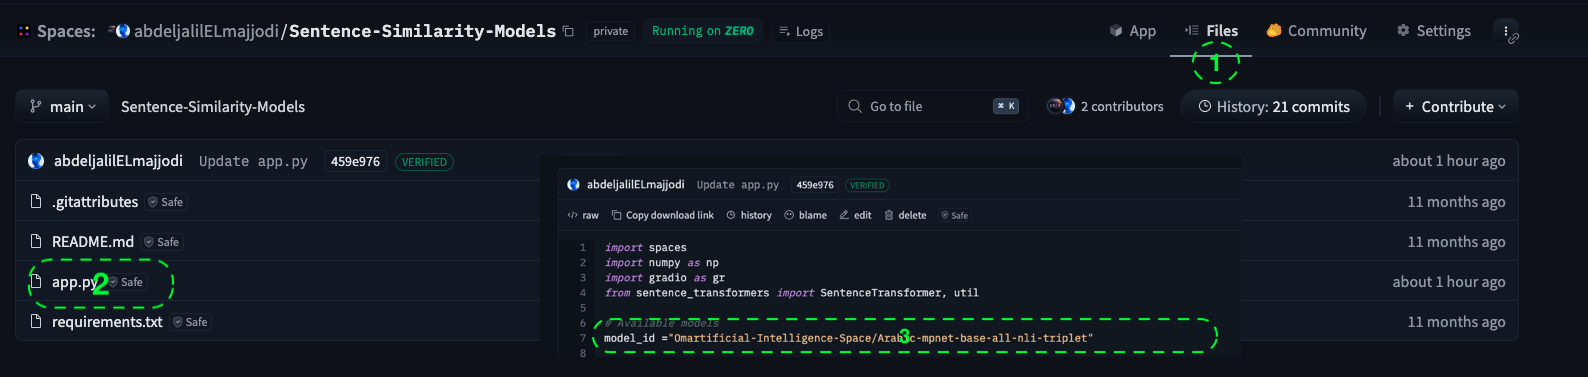
</center>

3. **Update the example inputs** to be compatible with your model’s expected format (e.g., appropriate masked sentences).
4. **Save and commit your changes**, then save changes.
